In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from src.util.evaluation import ForecastErrorEvaluation
from src.util.goal import ForecastingGoal, OneStepForecastingGoal
from src.pipeline import IPipeline
from src.util.goal import ForecastingGoal
from test.util import TestSuite
from src.pipeline.ar_linear_regression import Use_ARLinearRegression
from src.performer.supervised_learning_performer import SlidingWindowPerformer


from src.pipeline.ar_cnn_nn import Use_ARConvolutionalNeuralNetwork
from src.pipeline.ar_lstm_nn import Use_ARLongShortTermMemoryNeuralNetwork
from src.pipeline.ar_mlp_nn import Use_ARMultiLayerPerceptronNeuralNetwork

from src.pipeline.ar_linear_svr import Use_ARSupportVectorRegressionLinear
from src.pipeline.ar_rbf_svr import Use_ARSupportVectorRegressionRBF

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:

class Workflow():
    def __init__(self, series, goal: ForecastingGoal):
        self._series = series
        self._goal = goal
        self._pipelines = np.array([])
        self._results = []

    def __add_to_pipeline__(self, *pipelines: IPipeline):
        self._pipelines = np.array(pipelines)

    def __execute__(self):
        for i in range(len(self._pipelines)):
            t_result = self._pipelines[i].__execute__(series=self._series, goal=self._goal)
            self._results.append(np.array([t_result[0], t_result[1], t_result[2]]))
            print("Best Models:\t", t_result[0].__identify__(), "\t\t\tError:", str(t_result[2]))

    def __best_model__(self):
        temp = np.array(self._results)
        loss_errors = temp[::, 2]
        min = np.min(loss_errors)
        index = np.where(loss_errors == min)[0][0]
        return temp[index]
        


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
goal = OneStepForecastingGoal()
test_suite = TestSuite()
series1 = test_suite.__get_numpy_test_series_from_index__(6)
WF = Workflow(series=series1, goal=goal)
WF.__add_to_pipeline__(
    Use_ARLinearRegression(),
    Use_ARSupportVectorRegressionLinear(),
    # Use_ARSupportVectorRegressionRBF(),
    # Use_ARConvolutionalNeuralNetwork(),
    # Use_ARLongShortTermMemoryNeuralNetwork(),
    Use_ARMultiLayerPerceptronNeuralNetwork()
)
WF.__execute__()
print(WF.__best_model__())

Best Models:	 AR_LinearRegression(4); 			Error: 0.0018738222657702862
Best Models:	 AR_SupportVectorLinearRegression(6)(10,0.0001,True); 			Error: 0.002843700450232371
Best Models:	 AR_MultiLayerPerceptronNeuralNetwork(2); 			Error: 0.005318701732903719
 {'feature_length': 4} 0.0018738222657702862]


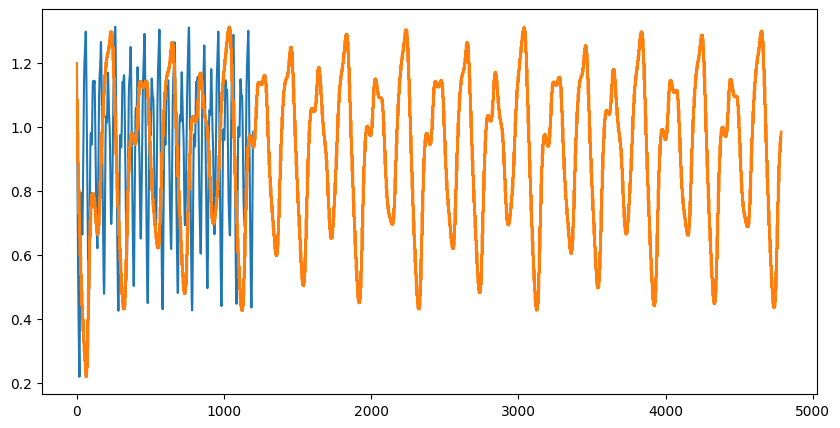

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(series1)
SWP = SlidingWindowPerformer(
    feature_length=4,
    target_length=1,
    target_offset=1
)
_, x, y, = SWP.get(series1)

# plt.plot()


In [21]:
x.flatten()

array([1.2     , 1.085805, 0.982477, ..., 0.971623, 0.982832, 0.986405],
      dtype=float32)